In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lichess_elite_2021-12.pgn to lichess_elite_2021-12.pgn


In [3]:
!pip install chess
!pip install python-chess
!pip install pandas
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=3a96554ce687f48ef64400d12d5e61b38bf8869e9783779601580b601c2c5380
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


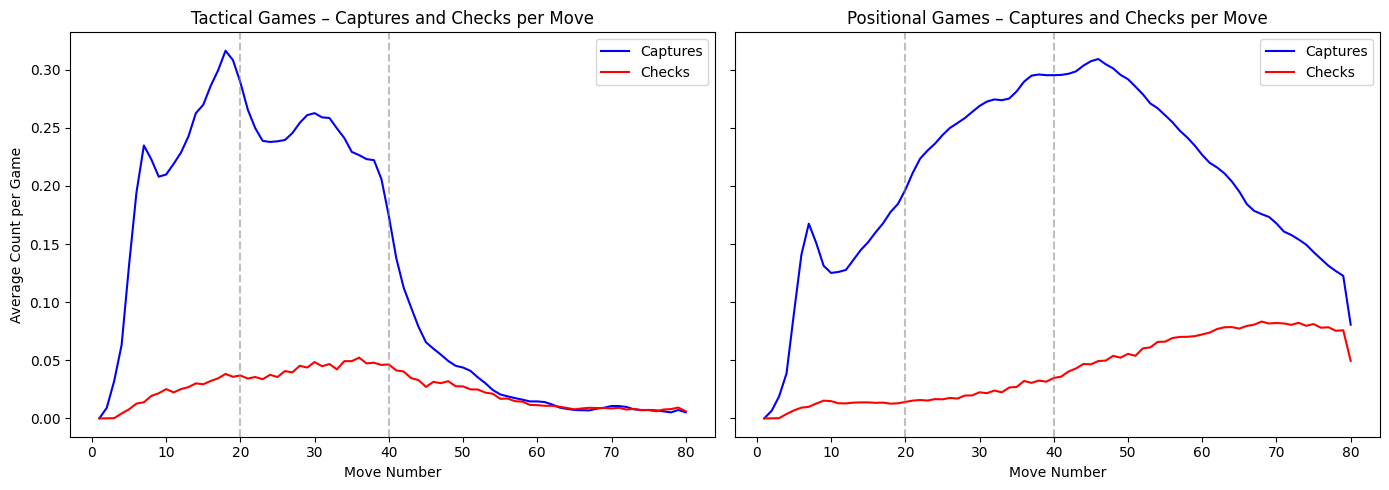

In [ ]:
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

max_moves = 80
tactical_captures = np.zeros(max_moves)
tactical_checks = np.zeros(max_moves)
positional_captures = np.zeros(max_moves)
positional_checks = np.zeros(max_moves)

tactical_games = 0
positional_games = 0

#moving average
def smooth(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

#490k+ chess games from lichess
pgn = open("lichess_elite_2021-12.pgn")

for i in range(10000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break

    board = game.board()
    captures = np.zeros(max_moves)
    checks = np.zeros(max_moves)

    for idx, move in enumerate(game.mainline_moves()):
        if idx >= max_moves:
            break
        if board.is_capture(move):
            captures[idx] += 1
        if board.gives_check(move):
            checks[idx] += 1
        board.push(move)


    early = np.sum(captures[:20])
    late = np.sum(captures[40:])
    if early > late:
        tactical_captures += captures
        tactical_checks += checks
        tactical_games += 1
    else:
        positional_captures += captures
        positional_checks += checks
        positional_games += 1

if tactical_games > 0:
    tactical_captures /= tactical_games
    tactical_checks /= tactical_games
if positional_games > 0:
    positional_captures /= positional_games
    positional_checks /= positional_games

tactical_captures = smooth(tactical_captures)
tactical_checks = smooth(tactical_checks)
positional_captures = smooth(positional_captures)
positional_checks = smooth(positional_checks)

#plot
x = np.arange(1, max_moves + 1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

#tactical
axes[0].plot(x, tactical_captures, label='Captures', color='blue')
axes[0].plot(x, tactical_checks, label='Checks', color='red')
axes[0].axvline(20, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(40, color='gray', linestyle='--', alpha=0.5)
axes[0].set_title("Tactical Games – Captures and Checks per Move")
axes[0].set_xlabel("Move Number")
axes[0].set_ylabel("Average Count per Game")
axes[0].legend()

#positional
axes[1].plot(x, positional_captures, label='Captures', color='blue')
axes[1].plot(x, positional_checks, label='Checks', color='red')
axes[1].axvline(20, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(40, color='gray', linestyle='--', alpha=0.5)
axes[1].set_title("Positional Games – Captures and Checks per Move")
axes[1].set_xlabel("Move Number")
axes[1].legend()

plt.tight_layout()
plt.show()


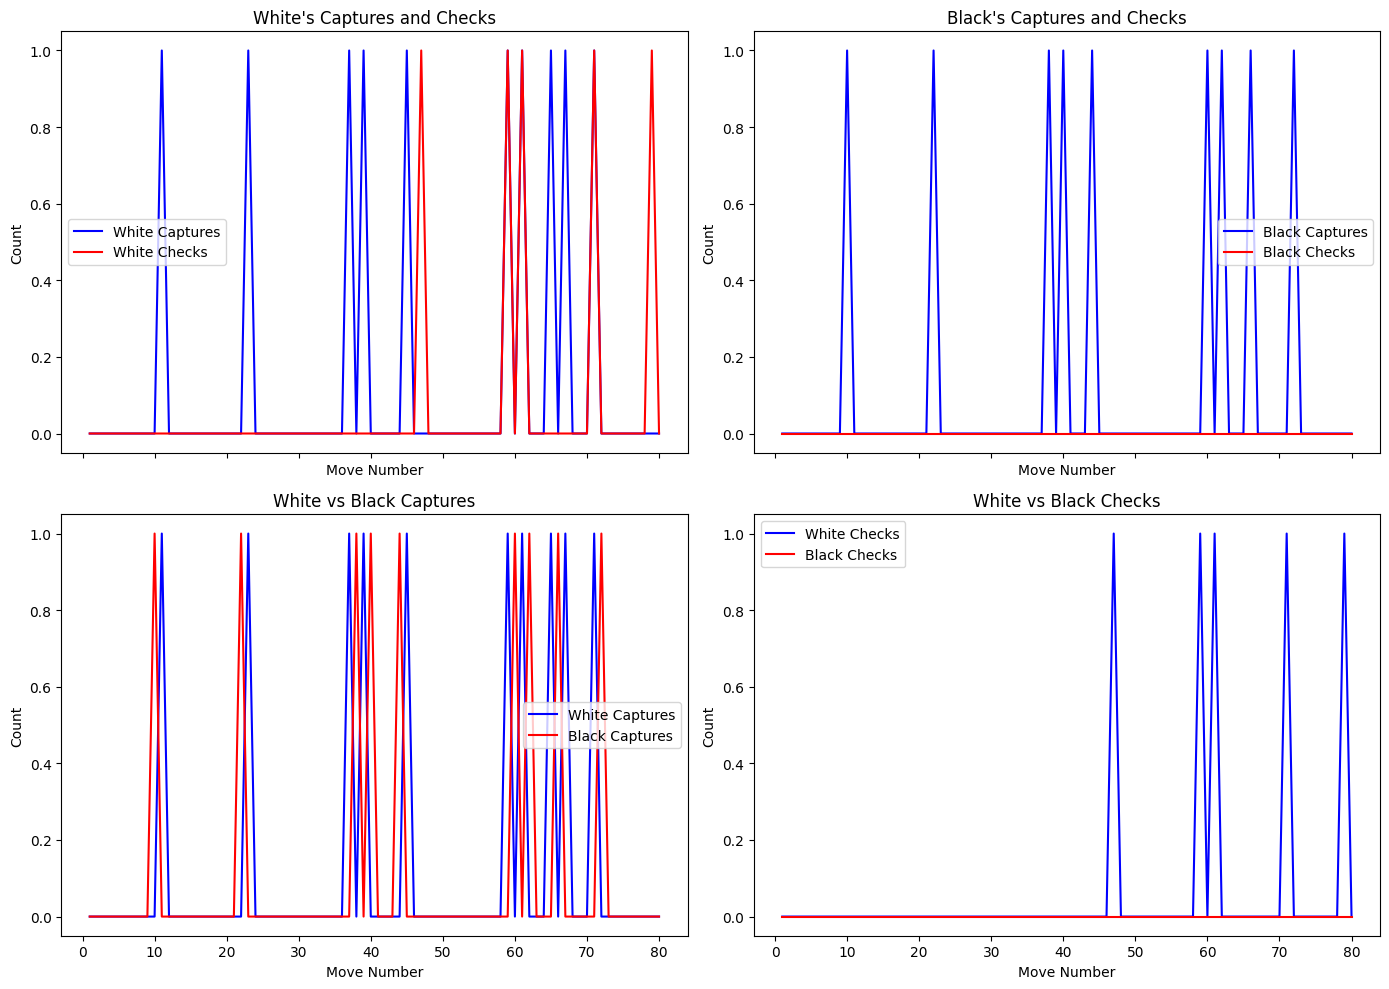

White's style: positional
Black's style: positional


In [ ]:
import chess.pgn
import numpy as np
import matplotlib.pyplot as plt

max_moves = 80
white_captures = np.zeros(max_moves)
white_checks = np.zeros(max_moves)
black_captures = np.zeros(max_moves)
black_checks = np.zeros(max_moves)

game_file = "tejapix_vs_gdm2024_2025.04.09.pgn"
pgn = open(game_file)

game = chess.pgn.read_game(pgn)

board = game.board()
for idx, move in enumerate(game.mainline_moves()):
    if idx >= max_moves:
        break

    if board.is_capture(move):
        if board.turn:
            white_captures[idx] += 1
        else:
            black_captures[idx] += 1

    if board.gives_check(move):
        if board.turn:
            white_checks[idx] += 1
        else:
            black_checks[idx] += 1

    board.push(move)

x = np.arange(1, max_moves + 1)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

axes[0, 0].plot(x, white_captures, label='White Captures', color='blue')
axes[0, 0].plot(x, white_checks, label='White Checks', color='red')
axes[0, 0].set_title("White's Captures and Checks")
axes[0, 0].set_xlabel("Move Number")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend()

axes[0, 1].plot(x, black_captures, label='Black Captures', color='blue')
axes[0, 1].plot(x, black_checks, label='Black Checks', color='red')
axes[0, 1].set_title("Black's Captures and Checks")
axes[0, 1].set_xlabel("Move Number")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend()

axes[1, 0].plot(x, white_captures, label='White Captures', color='blue')
axes[1, 0].plot(x, black_captures, label='Black Captures', color='red')
axes[1, 0].set_title("White vs Black Captures")
axes[1, 0].set_xlabel("Move Number")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend()

axes[1, 1].plot(x, white_checks, label='White Checks', color='blue')
axes[1, 1].plot(x, black_checks, label='Black Checks', color='red')
axes[1, 1].set_title("White vs Black Checks")
axes[1, 1].set_xlabel("Move Number")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

early_white = np.sum(white_captures[:20])
late_white = np.sum(white_captures[40:])
early_black = np.sum(black_captures[:20])
late_black = np.sum(black_captures[40:])

white_game_type = "tactical" if early_white > late_white else "positional"
black_game_type = "tactical" if early_black > late_black else "positional"


print(f"White's style: {white_game_type}")
print(f"Black's style: {black_game_type}")


In [36]:
import chess.pgn


with open("tejapix_vs_gdm2024_2025.04.09.pgn") as pgn_file:
    game = chess.pgn.read_game(pgn_file)

if game is None:
    raise ValueError("No game found in PGN.")

board = game.board()
move_data = []

for move in game.mainline_moves():

    player = "White" if board.turn else "Black"
    move_number = board.fullmove_number
    san = board.san(move)
    gave_check = board.gives_check(move)
    piece = board.piece_at(move.from_square)

    if gave_check:
        move_info = {
            "move": f"{move_number}{'...' if player == 'Black' else '.'} {san}",
            "player": player,
            "piece": piece.symbol().upper() if player == "White" else piece.symbol().lower()
        }
        move_data.append(move_info)

    board.push(move)

print("Checks found in the game:")
for info in move_data:
    print(f"{info['move']} ({info['piece']}) — CHECK!")


Checks found in the game:
24. Ne7+ (N) — CHECK!
30. Qxe8+ (Q) — CHECK!
31. Rxe8+ (R) — CHECK!
36. gxf6+ (P) — CHECK!
40. Bb1+ (B) — CHECK!
54. c8=Q+ (P) — CHECK!


In [38]:
import chess.pgn
import numpy as np


with open("tejapix_vs_gdm2024_2025.04.09.pgn") as pgn_file:
    game = chess.pgn.read_game(pgn_file)

#central control analysis
target_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
square_names = ['d4', 'd5', 'e4', 'e5']


white_control = {sq: [] for sq in target_squares}
black_control = {sq: [] for sq in target_squares}

board = game.board()
move_counter = 0
moves = list(game.mainline_moves())

while move_counter < len(moves):
    board.push(moves[move_counter])
    if move_counter + 1 < len(moves):
        board.push(moves[move_counter + 1])

    for sq in target_squares:
        white_attackers = len(board.attackers(chess.WHITE, sq))
        black_attackers = len(board.attackers(chess.BLACK, sq))

        white_control[sq].append(white_attackers)
        black_control[sq].append(black_attackers)

    move_counter += 2


print("White's Control over d4, d5, e4, e5 (number of attackers per move):")
for i in range(len(white_control[chess.D4])):
    print(f"Move {i+1}: ", end="")
    for sq, name in zip(target_squares, square_names):
        print(f"{name}: {white_control[sq][i]}", end="  ")
    print()

print("\nBlack's Control over d4, d5, e4, e5 (number of attackers per move):")
for i in range(len(black_control[chess.D4])):
    print(f"Move {i+1}: ", end="")
    for sq, name in zip(target_squares, square_names):
        print(f"{name}: {black_control[sq][i]}", end="  ")
    print()


White's Control over d4, d5, e4, e5 (number of attackers per move):
Move 1: d4: 0  d5: 1  e4: 0  e5: 0  
Move 2: d4: 0  d5: 2  e4: 1  e5: 0  
Move 3: d4: 0  d5: 3  e4: 1  e5: 0  
Move 4: d4: 0  d5: 3  e4: 2  e5: 0  
Move 5: d4: 0  d5: 3  e4: 2  e5: 0  
Move 6: d4: 0  d5: 3  e4: 2  e5: 1  
Move 7: d4: 1  d5: 3  e4: 2  e5: 2  
Move 8: d4: 1  d5: 3  e4: 2  e5: 2  
Move 9: d4: 1  d5: 3  e4: 2  e5: 2  
Move 10: d4: 1  d5: 3  e4: 2  e5: 2  
Move 11: d4: 1  d5: 2  e4: 1  e5: 2  
Move 12: d4: 1  d5: 1  e4: 1  e5: 2  
Move 13: d4: 1  d5: 1  e4: 1  e5: 2  
Move 14: d4: 1  d5: 1  e4: 2  e5: 3  
Move 15: d4: 1  d5: 1  e4: 2  e5: 3  
Move 16: d4: 1  d5: 1  e4: 2  e5: 2  
Move 17: d4: 1  d5: 1  e4: 2  e5: 2  
Move 18: d4: 0  d5: 1  e4: 2  e5: 0  
Move 19: d4: 1  d5: 2  e4: 1  e5: 0  
Move 20: d4: 1  d5: 2  e4: 1  e5: 1  
Move 21: d4: 2  d5: 1  e4: 2  e5: 2  
Move 22: d4: 3  d5: 2  e4: 1  e5: 1  
Move 23: d4: 2  d5: 1  e4: 2  e5: 2  
Move 24: d4: 1  d5: 2  e4: 2  e5: 2  
Move 25: d4: 2  d5: 1  e4: 2 

In [40]:

total_white_control = sum(sum(white_control[sq]) for sq in target_squares)
total_black_control = sum(sum(black_control[sq]) for sq in target_squares)


print("\nTotal Central Control:")
print(f"White: {total_white_control}")
print(f"Black: {total_black_control}")


if total_white_control > total_black_control:
    print("White had more control of the center overall.")
elif total_black_control > total_white_control:
    print("Black had more control of the center overall.")
else:
    print("Center control was equal between White and Black.")


Total Central Control:
White: 215
Black: 159
White had more control of the center overall.


In [41]:
import chess.pgn


pgn_path = "lichess_elite_2021-12.pgn"

target_squares = [chess.D4, chess.D5, chess.E4, chess.E5]

games_analyzed = 0
center_winner_match = 0
white_wins = 0
black_wins = 0
draws = 0

with open(pgn_path) as pgn_file:
    while games_analyzed < 10000:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers.get("Result")
        if result not in ["1-0", "0-1", "1/2-1/2"]:
            continue

        board = game.board()
        white_control = 0
        black_control = 0

        for move in game.mainline_moves():
            board.push(move)

            for sq in target_squares:
                white_control += len(board.attackers(chess.WHITE, sq))
                black_control += len(board.attackers(chess.BLACK, sq))


        if white_control > black_control:
            control_winner = "white"
        elif black_control > white_control:
            control_winner = "black"
        else:
            control_winner = "equal"


        if result == "1-0":
            white_wins += 1
            if control_winner == "white":
                center_winner_match += 1
        elif result == "0-1":
            black_wins += 1
            if control_winner == "black":
                center_winner_match += 1
        elif result == "1/2-1/2":
            draws += 1


        games_analyzed += 1

# Print summary
print(f"\nGames analyzed: {games_analyzed}")
print(f"Player with more center control won: {center_winner_match} times")
print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
print(f"Accuracy of center control as a winning indicator: {center_winner_match / (white_wins + black_wins):.2%}")



Games analyzed: 10000
Player with more center control won: 5149 times
White wins: 4779, Black wins: 4278, Draws: 943
Accuracy of center control as a winning indicator: 56.85%


In [42]:
import chess.pgn

def count_controlled_squares(board, color):
    controlled = set()
    for square in chess.SQUARES:
        if board.color_at(square) == color:
            piece = board.piece_at(square)
            if piece:
                attacks = board.attacks(square)
                controlled.update(attacks)
    return controlled

pgn_path = "lichess_elite_2021-12.pgn"
num_games = 10000
with open(pgn_path, 'r', encoding='utf-8') as pgn_file:
    white_wins = black_wins = draws = 0
    control_match_wins = 0
    games_analyzed = 0

    while games_analyzed < num_games:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers["Result"]
        if result == "*":
            continue

        board = game.board()
        white_control_total = 0
        black_control_total = 0

        for move in game.mainline_moves():
            board.push(move)
            white_control_total += len(count_controlled_squares(board, chess.WHITE))
            black_control_total += len(count_controlled_squares(board, chess.BLACK))

        winner = None
        if result == "1-0":
            winner = "white"
            white_wins += 1
        elif result == "0-1":
            winner = "black"
            black_wins += 1
        else:
            draws += 1

        control_winner = "white" if white_control_total > black_control_total else "black" if black_control_total > white_control_total else "draw"

        if control_winner == winner:
            control_match_wins += 1

        games_analyzed += 1

    print(f"Games analyzed: {games_analyzed}")
    print(f"Player with more board control won: {control_match_wins} times")
    print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
    print(f"Accuracy of total board control as a winning indicator: {control_match_wins / games_analyzed * 100:.2f}%")


Games analyzed: 10000
Player with more board control won: 5898 times
White wins: 4779, Black wins: 4278, Draws: 943
Accuracy of total board control as a winning indicator: 58.98%


In [43]:
import chess.pgn

def count_controlled_squares(board, color):
    controlled = set()
    for square in chess.SQUARES:
        if board.color_at(square) == color:
            piece = board.piece_at(square)
            if piece:
                attacks = board.attacks(square)
                controlled.update(attacks)
    return controlled


alpha = 2.0
beta = 1.0

center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]

pgn_path = "lichess_elite_2021-12.pgn"
num_games = 1000

with open(pgn_path, 'r', encoding='utf-8') as pgn_file:
    white_wins = black_wins = draws = 0
    combined_match_wins = 0
    games_analyzed = 0

    while games_analyzed < num_games:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers["Result"]
        if result == "*":
            continue

        board = game.board()
        white_total_control = 0
        black_total_control = 0
        white_center_control = 0
        black_center_control = 0

        for move in game.mainline_moves():
            board.push(move)

            white_controlled = count_controlled_squares(board, chess.WHITE)
            black_controlled = count_controlled_squares(board, chess.BLACK)

            white_total_control += len(white_controlled)
            black_total_control += len(black_controlled)

            white_center_control += sum(1 for sq in center_squares if sq in white_controlled)
            black_center_control += sum(1 for sq in center_squares if sq in black_controlled)


        white_combined = alpha * white_center_control + beta * white_total_control
        black_combined = alpha * black_center_control + beta * black_total_control


        winner = None
        if result == "1-0":
            winner = "white"
            white_wins += 1
        elif result == "0-1":
            winner = "black"
            black_wins += 1
        else:
            winner = "draw"
            draws += 1

        control_winner = (
            "white" if white_combined > black_combined else
            "black" if black_combined > white_combined else
            "draw"
        )

        if control_winner == winner:
            combined_match_wins += 1

        games_analyzed += 1

    print(f"Games analyzed: {games_analyzed}")
    print(f"Player with more combined control won: {combined_match_wins} times")
    print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
    print(f"Accuracy of combined control as a winning indicator: {combined_match_wins / games_analyzed * 100:.2f}%")


Games analyzed: 1000
Player with more combined control won: 599 times
White wins: 468, Black wins: 449, Draws: 83
Accuracy of combined control as a winning indicator: 59.90%


In [44]:
import chess.pgn

def is_developed(board, square, piece_type, color):
    piece = board.piece_at(square)
    return piece is None or piece.piece_type != piece_type or piece.color != color

def development_status(board):
    dev = {chess.WHITE: 0, chess.BLACK: 0}

    white_home = [chess.B1, chess.G1, chess.C1, chess.F1]
    black_home = [chess.B8, chess.G8, chess.C8, chess.F8]
    white_types = [chess.KNIGHT, chess.KNIGHT, chess.BISHOP, chess.BISHOP]
    black_types = [chess.KNIGHT, chess.KNIGHT, chess.BISHOP, chess.BISHOP]

    for sq, piece_type in zip(white_home, white_types):
        if is_developed(board, sq, piece_type, chess.WHITE):
            dev[chess.WHITE] += 1
    for sq, piece_type in zip(black_home, black_types):
        if is_developed(board, sq, piece_type, chess.BLACK):
            dev[chess.BLACK] += 1

    if not board.has_castling_rights(chess.WHITE):
        dev[chess.WHITE] += 2
    if not board.has_castling_rights(chess.BLACK):
        dev[chess.BLACK] += 2

    return dev


pgn_path = "lichess_elite_2021-12.pgn"
num_games = 1000

with open(pgn_path, 'r', encoding='utf-8') as pgn_file:
    white_wins = black_wins = draws = 0
    winner_dev_by_15 = 0
    games_analyzed = 0

    while games_analyzed < num_games:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers["Result"]
        if result == "*":
            continue

        board = game.board()
        dev_by_15 = {chess.WHITE: False, chess.BLACK: False}

        move_num = 0
        for move in game.mainline_moves():
            board.push(move)
            move_num += 1


            if move_num == 30:
                dev = development_status(board)
                if dev[chess.WHITE] >= 6:
                    dev_by_15[chess.WHITE] = True
                if dev[chess.BLACK] >= 6:
                    dev_by_15[chess.BLACK] = True
                break


        winner = None
        if result == "1-0":
            winner = chess.WHITE
            white_wins += 1
        elif result == "0-1":
            winner = chess.BLACK
            black_wins += 1
        else:
            draws += 1
            continue

        if dev_by_15[winner]:
            winner_dev_by_15 += 1

        games_analyzed += 1

    print(f"Games analyzed: {games_analyzed}")
    print(f"Winner had all pieces developed by move 15: {winner_dev_by_15} times")
    print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
    print(f"Frequency: {(winner_dev_by_15 / (white_wins + black_wins)) * 100:.2f}%")


Games analyzed: 1000
Winner had all pieces developed by move 15: 583 times
White wins: 507, Black wins: 493, Draws: 87
Frequency: 58.30%


In [45]:
import chess.pgn

def count_controlled_squares(board, color):
    controlled = set()
    for square in chess.SQUARES:
        if board.color_at(square) == color:
            piece = board.piece_at(square)
            if piece:
                attacks = board.attacks(square)
                controlled.update(attacks)
    return controlled

def development_score(game):
    board = game.board()
    dev_turns = {"white": 0, "black": 0}
    developed = {"white": set(), "black": set()}
    dev_pieces = {chess.WHITE: ["b1", "g1", "c1", "f1"], chess.BLACK: ["b8", "g8", "c8", "f8"]}
    dev_targets = {chess.WHITE: "white", chess.BLACK: "black"}
    piece_names = {"N", "B"}

    for ply, move in enumerate(game.mainline_moves()):
        board.push(move)
        color = board.turn ^ True

        for square in dev_pieces[color]:
            sq = chess.parse_square(square)
            piece = board.piece_at(sq)
            if piece is None or piece.symbol().upper() not in piece_names:
                developed[dev_targets[color]].add(square)

        if len(developed["white"]) >= 4 and dev_turns["white"] == 0:
            dev_turns["white"] = ply + 1
        if len(developed["black"]) >= 4 and dev_turns["black"] == 0:
            dev_turns["black"] = ply + 1

        if dev_turns["white"] and dev_turns["black"]:
            break


    return dev_turns["white"], dev_turns["black"]

alpha = 2.0
beta = 1.0
gamma = 1.5

center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]

pgn_path = "lichess_elite_2021-12.pgn"
num_games = 1000

with open(pgn_path, 'r', encoding='utf-8') as pgn_file:
    white_wins = black_wins = draws = 0
    combined_match_wins = 0
    games_analyzed = 0

    while games_analyzed < num_games:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers["Result"]
        if result == "*":
            continue

        board = game.board()
        white_total_control = 0
        black_total_control = 0
        white_center_control = 0
        black_center_control = 0

        for move in game.mainline_moves():
            board.push(move)
            white_controlled = count_controlled_squares(board, chess.WHITE)
            black_controlled = count_controlled_squares(board, chess.BLACK)

            white_total_control += len(white_controlled)
            black_total_control += len(black_controlled)

            white_center_control += sum(1 for sq in center_squares if sq in white_controlled)
            black_center_control += sum(1 for sq in center_squares if sq in black_controlled)


        white_dev, black_dev = development_score(game)
        white_dev_score = 1 / white_dev if white_dev else 0
        black_dev_score = 1 / black_dev if black_dev else 0

        white_combined = alpha * white_center_control + beta * white_total_control + gamma * white_dev_score
        black_combined = alpha * black_center_control + beta * black_total_control + gamma * black_dev_score

        winner = None
        if result == "1-0":
            winner = "white"
            white_wins += 1
        elif result == "0-1":
            winner = "black"
            black_wins += 1
        else:
            winner = "draw"
            draws += 1

        control_winner = (
            "white" if white_combined > black_combined else
            "black" if black_combined > white_combined else
            "draw"
        )

        if control_winner == winner:
            combined_match_wins += 1

        games_analyzed += 1

    print(f"Games analyzed: {games_analyzed}")
    print(f"Player with better combined heuristic won: {combined_match_wins} times")
    print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
    print(f"Accuracy of heuristic as a winning indicator: {combined_match_wins / games_analyzed * 100:.2f}%")


Games analyzed: 1000
Player with better combined heuristic won: 600 times
White wins: 468, Black wins: 449, Draws: 83
Accuracy of heuristic as a winning indicator: 60.00%


In [46]:
import chess.pgn

def count_controlled_squares(board, color):
    controlled = set()
    for square in chess.SQUARES:
        if board.color_at(square) == color:
            piece = board.piece_at(square)
            if piece:
                attacks = board.attacks(square)
                controlled.update(attacks)
    return controlled

def check_castling_before_move_10(game, color):
    board = game.board()
    move_number = 0
    for move in game.mainline_moves():
        board.push(move)
        move_number += 1

        if board.turn != color:
            if board.has_castling_rights(color) is False and (board.king(color) in [chess.G1, chess.C1, chess.G8, chess.C8]):
                return move_number <= 24

    return False


alpha = 2.0
beta = 1.0
gamma = 1.5
delta = 1.5

center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
minor_pieces = [chess.KNIGHT, chess.BISHOP]

pgn_path = "lichess_elite_2021-12.pgn"
num_games = 1000

with open(pgn_path, 'r', encoding='utf-8') as pgn_file:
    white_wins = black_wins = draws = 0
    heuristic_match_wins = 0
    games_analyzed = 0

    while games_analyzed < num_games:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break

        result = game.headers["Result"]
        if result == "*":
            continue

        board = game.board()
        white_total_control = 0
        black_total_control = 0
        white_center_control = 0
        black_center_control = 0
        white_development = 0
        black_development = 0
        move_number = 0

        for move in game.mainline_moves():
            board.push(move)
            move_number += 1

            white_controlled = count_controlled_squares(board, chess.WHITE)
            black_controlled = count_controlled_squares(board, chess.BLACK)

            white_total_control += len(white_controlled)
            black_total_control += len(black_controlled)

            white_center_control += sum(1 for sq in center_squares if sq in white_controlled)
            black_center_control += sum(1 for sq in center_squares if sq in black_controlled)


            for square in chess.SQUARES:
                piece = board.piece_at(square)
                if piece and piece.piece_type in minor_pieces:
                    if piece.color == chess.WHITE and chess.square_rank(square) != 0:
                        white_development += 1
                    elif piece.color == chess.BLACK and chess.square_rank(square) != 7:
                        black_development += 1


        white_castled_early = check_castling_before_move_10(game, chess.WHITE)
        black_castled_early = check_castling_before_move_10(game, chess.BLACK)

        white_king_safety = 1 if white_castled_early else 0
        black_king_safety = 1 if black_castled_early else 0


        white_score = (
            alpha * white_center_control +
            beta * white_total_control +
            gamma * white_development +
            delta * white_king_safety
        )

        black_score = (
            alpha * black_center_control +
            beta * black_total_control +
            gamma * black_development +
            delta * black_king_safety
        )


        winner = None
        if result == "1-0":
            winner = "white"
            white_wins += 1
        elif result == "0-1":
            winner = "black"
            black_wins += 1
        else:
            winner = "draw"
            draws += 1

        predicted = (
            "white" if white_score > black_score else
            "black" if black_score > white_score else
            "draw"
        )

        if predicted == winner:
            heuristic_match_wins += 1

        games_analyzed += 1

    print(f"Games analyzed: {games_analyzed}")
    print(f"Player with better combined heuristic (incl. king safety) won: {heuristic_match_wins} times")
    print(f"White wins: {white_wins}, Black wins: {black_wins}, Draws: {draws}")
    print(f"Accuracy of heuristic as a winning indicator: {heuristic_match_wins / games_analyzed * 100:.2f}%")


Games analyzed: 1000
Player with better combined heuristic (incl. king safety) won: 592 times
White wins: 468, Black wins: 449, Draws: 83
Accuracy of heuristic as a winning indicator: 59.20%


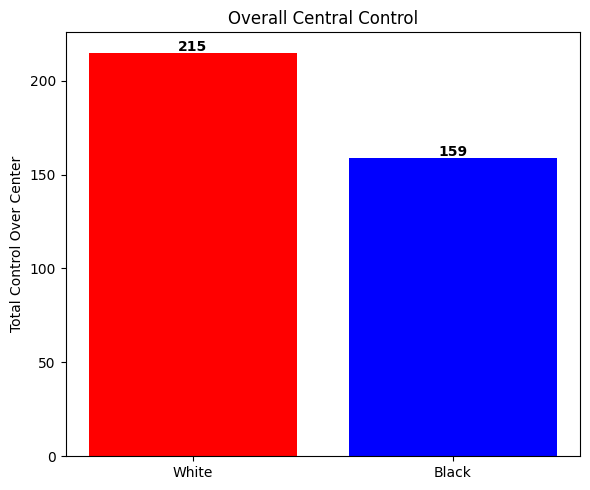

In [74]:
import matplotlib.pyplot as plt

labels = ['White', 'Black']
values = [total_white_control, total_black_control]
colors = ['red', 'blue']

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=colors)
plt.ylabel("Total Control Over Center")
plt.title("Overall Central Control")
for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()




In [7]:
import chess.pgn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm


def extract_features(game):
    board = game.board()
    features = {
        "material_diff": 0,
        "king_attacks": 0,
        "center_control": 0,
        "pawn_moves": 0,
        "piece_development": 0,
    }
    dev_squares = [chess.D3, chess.E3, chess.D6, chess.E6]
    center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]

    for move in game.mainline_moves():
        piece = board.piece_at(move.from_square)
        if piece:
            #material balance
            value = {
                chess.PAWN: 1,
                chess.KNIGHT: 3,
                chess.BISHOP: 3,
                chess.ROOK: 5,
                chess.QUEEN: 9,
            }.get(piece.piece_type, 0)

            if piece.piece_type == chess.PAWN:
                features["pawn_moves"] += 1

            if piece.color == chess.WHITE:
                features["material_diff"] += value
            else:
                features["material_diff"] -= value

            #king attack
            if chess.square_distance(move.to_square, board.king(not piece.color)) <= 1:
                features["king_attacks"] += 1

            #center control
            if move.to_square in center_squares:
                features["center_control"] += 1

            #development
            if move.to_square in dev_squares:
                features["piece_development"] += 1

        board.push(move)

    total_moves = len(list(game.mainline_moves()))
    total_moves = max(total_moves, 1)

    return [
        features["material_diff"] / 10,
        features["king_attacks"] / total_moves,
        features["center_control"] / total_moves,
        features["pawn_moves"] / total_moves,
        features["piece_development"] / total_moves,
    ]

#labels
def label_game(features):
    #more king attacks & less pawn moves=tactical
    score = features[1] - 0.5 * features[3] + features[2]
    return 1 if score > 0.02 else 0

#pgn
def load_data(pgn_path, max_games=1000):
    X, y = [], []
    with open(pgn_path, 'r', encoding='utf-8') as f:
        for _ in tqdm(range(max_games)):
            game = chess.pgn.read_game(f)
            if not game:
                break
            try:
                features = extract_features(game)
                label = label_game(features)
                X.append(features)
                y.append(label)
            except Exception as e:
                continue
    return np.array(X), np.array(y)

#train model
pgn_file = "/content/lichess_elite_2021-12.pgn"
X, y = load_data(pgn_file, max_games=2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Positional", "Tactical"]))


100%|██████████| 2000/2000 [00:06<00:00, 324.43it/s]


              precision    recall  f1-score   support

  Positional       0.96      0.91      0.94       171
    Tactical       0.94      0.97      0.96       229

    accuracy                           0.95       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.95      0.95      0.95       400



In [10]:
#prediction
def predict_own_game(pgn_path, model):
    with open(pgn_path, 'r', encoding='utf-8') as f:
        game = chess.pgn.read_game(f)
        if not game:
            print("No game found in the PGN file.")
            return
        features = extract_features(game)
        features_array = np.array(features).reshape(1, -1)
        prediction = model.predict(features_array)[0]
        label = "Tactical" if prediction == 1 else "Positional"
        print(f"Your game was classified as: {label}")

#game submission
your_game_path = "/content/Hikaru_vs_Noureddin77Chess_2024.07.02.pgn"
predict_own_game(your_game_path, clf)

#prediction
def predict_own_game(pgn_path, model):
    with open(pgn_path, 'r', encoding='utf-8') as f:
        game = chess.pgn.read_game(f)
        if not game:
            print("No game found in the PGN file.")
            return
        features = extract_features(game)
        features_array = np.array(features).reshape(1, -1)
        prediction = model.predict(features_array)[0]
        label = "Tactical" if prediction == 1 else "Positional"
        print(f"Your game was classified as: {label}")

#game submission
your_game_path = "/content/IMRosen_vs_Sigmaturtle2011_2025.04.07.pgn"
predict_own_game(your_game_path, clf)

Your game was classified as: Tactical
Your game was classified as: Positional
